# Registration and metrics with module

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from skimage.transform import resize, AffineTransform, warp

from tifffile import imread

from __future__ import print_function

import stainwarpy

In [2]:
def load_image_data(folder_path):

    img_data = []
    label_data = []
    
    for _, _, files in os.walk(folder_path):
        for index, file in enumerate(files):
            if file.endswith(".tif"): 
                image_path = os.path.join(folder_path, file)
                img_raw = imread(image_path)
                img = np.array(img_raw)
                img_data.append(img)

    return img_data

def display_image(img):
    img = img.astype(float)
    img = img / img.max()
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.colorbar()                 
    plt.show()

## H&E as moving image

#### Load data

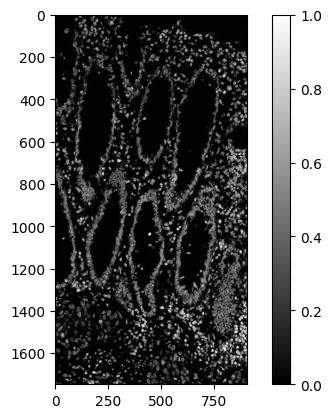

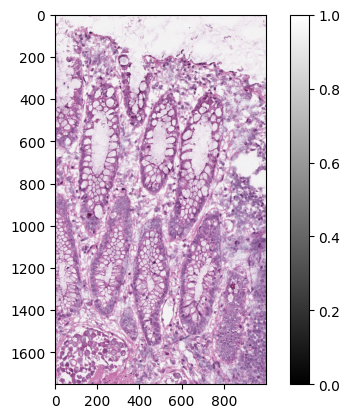

In [3]:
hne_px_sz = 0.5023
dapi_px_sz = 0.209877

scale = hne_px_sz / dapi_px_sz

# load dapi
dapi_img_data = load_image_data("../../../Data/for_testing/exmp_1/cropped/dapi")
dapi1_init = resize(dapi_img_data[0], (int(dapi_img_data[0].shape[0]/scale), int(dapi_img_data[0].shape[1]/scale)), anti_aliasing=True)
dapi2_init = resize(dapi_img_data[1], (int(dapi_img_data[1].shape[0]/scale), int(dapi_img_data[1].shape[1]/scale)), anti_aliasing=True)
dapi1_init, dapi2_init = dapi1_init*255, dapi2_init*255

# load hne
hne_image_data = load_image_data("../../../Data/for_testing/exmp_1/cropped/hne")
hne1_init = hne_image_data[0]
hne2_init = hne_image_data[1]

display_image(dapi1_init)
display_image(hne1_init)

#### Preprocess images

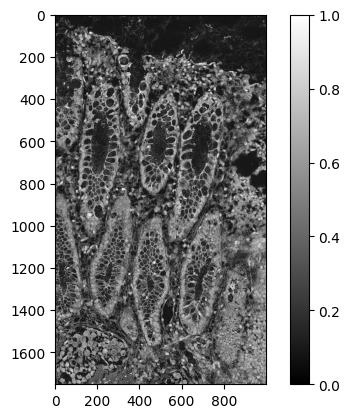

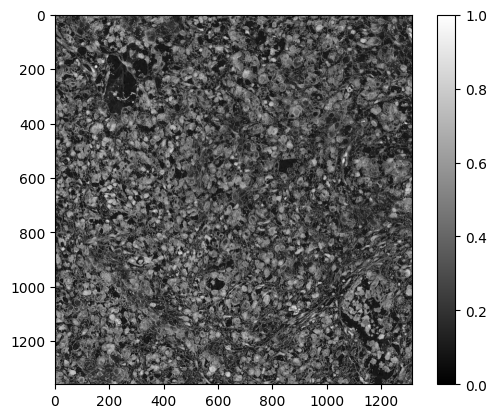

In [4]:
hne1_deconv = stainwarpy.colour_deconvolusion_preprocessing_HnE(hne1_init)
hne2_deconv = stainwarpy.colour_deconvolusion_preprocessing_HnE(hne2_init)
display_image(hne1_deconv)
display_image(hne2_deconv)

#### Register images

In [5]:
def overlay_images(dapi_img, hne_img, title='overlay'):
    h, w = dapi_img.shape
    plt.imshow(dapi_img, cmap='Greens', alpha=1)
    plt.imshow(hne_img, cmap='Reds', alpha=0.4)
    plt.title(title)
    plt.axis([0, w, h, 0])
    
    legend_patches = [
        Patch(color='green', label='DAPI', alpha=0.8),
        Patch(color='red', label='HnE', alpha=0.4)
    ]
    plt.legend(handles=legend_patches)

def display_img_comparison(dapi_img, hne_img, hne_deconv, registered_hne_img):

    h, w = dapi_img.shape
    
    plt.figure(figsize=(4*3, 6))

    plt.subplot(1, 4, 1)
    plt.title('DAPI image')
    plt.imshow(dapi_img, cmap='gray')
    plt.axis([0, w, h, 0])

    plt.subplot(1, 4, 2)
    plt.title('HnE image')
    plt.imshow(hne_img, cmap='gray')
    plt.axis([0, w, h, 0])

    plt.subplot(1, 4, 3)
    overlay_images(dapi_img, hne_deconv, title='initial overlay')

    plt.subplot(1, 4, 4)
    overlay_images(dapi_img, registered_hne_img, title='registered overlay')

    plt.tight_layout()
    plt.show()

Feature based registration completed.


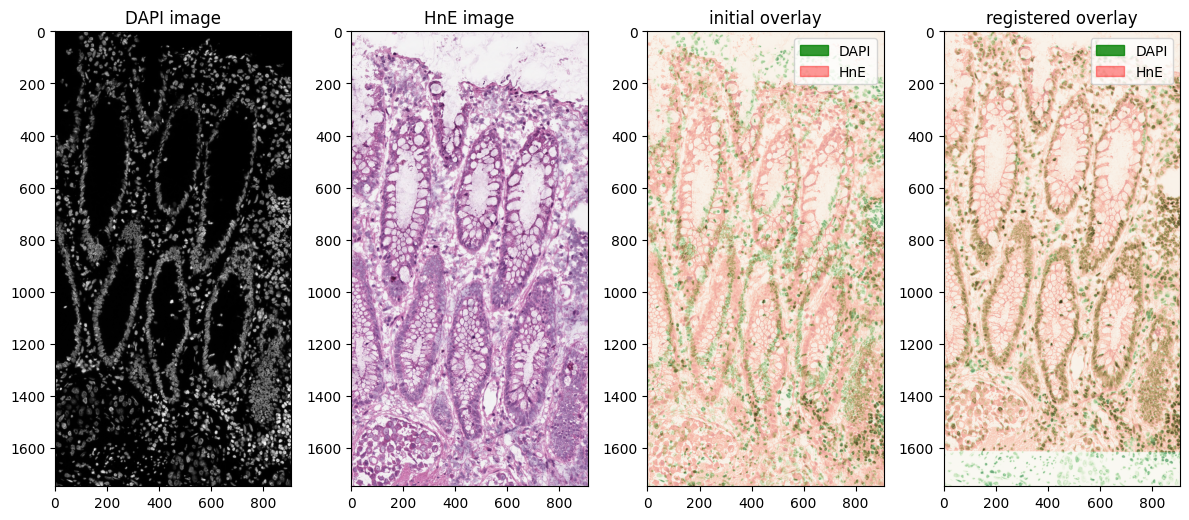

rTRE before registration:  0.06814488497813144
rTRE after feature based registration:  0.000658958861125306
normalized MI before registration:  0.0024897097794239183
normalized MI after feature based registration:  0.05429741363756572


In [6]:
# similarity transform 
img1_tforms, img1_registered, img1_tre_pts = stainwarpy.register_DAPI_HnE(dapi1_init, hne1_deconv)
display_img_comparison(dapi1_init, hne1_init, hne1_deconv,img1_registered)
tre = stainwarpy.compute_TRE(img1_tforms, img1_tre_pts, dapi1_init)
mi = stainwarpy.compute_mutual_information(dapi1_init, hne1_deconv, img1_registered)

Feature based registration completed.


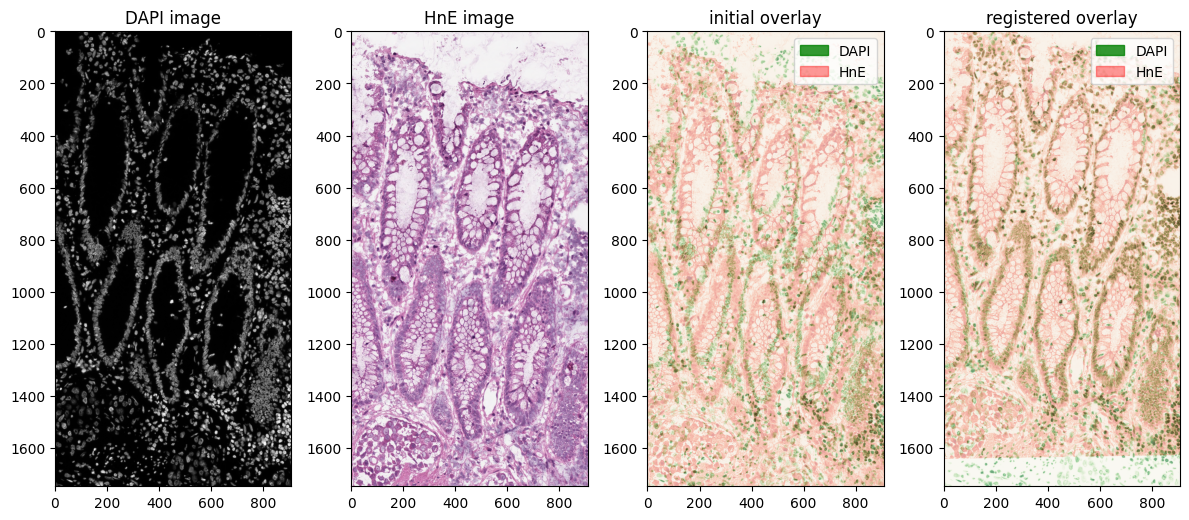

rTRE before registration:  0.06908448626498873
rTRE after feature based registration:  0.0015397654817087202
normalized MI before registration:  0.0024897097794239183
normalized MI after feature based registration:  0.03840457884686757


In [7]:
# projective transform
img1_tforms, img1_registered, img1_tre_pts = stainwarpy.register_DAPI_HnE(dapi1_init, hne1_deconv, feature_tform='projective')
display_img_comparison(dapi1_init, hne1_init, hne1_deconv, img1_registered)
tre = stainwarpy.compute_TRE(img1_tforms, img1_tre_pts, dapi1_init)
mi = stainwarpy.compute_mutual_information(dapi1_init, hne1_deconv, img1_registered)

Feature based registration completed.


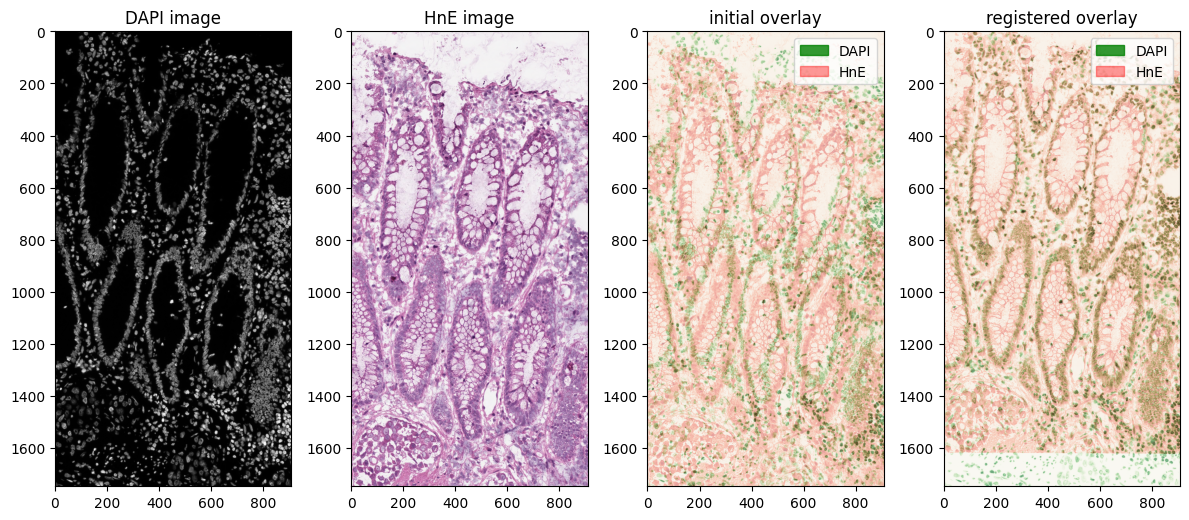

rTRE before registration:  0.06814488497813145
rTRE after feature based registration:  0.000776794312598897
normalized MI before registration:  0.0024897097794239183
normalized MI after feature based registration:  0.0477894675036676


In [ ]:
# affine transform
img1_tforms, img1_registered, img1_tre_pts = stainwarpy.register_DAPI_HnE(dapi1_init, hne1_deconv, feature_tform='affine')
display_img_comparison(dapi1_init, hne1_init, hne1_deconv,img1_registered)
tre = stainwarpy.compute_TRE(img1_tforms, img1_tre_pts, dapi1_init)
mi = stainwarpy.compute_mutual_information(dapi1_init, hne1_deconv, img1_registered)

Feature based registration completed.


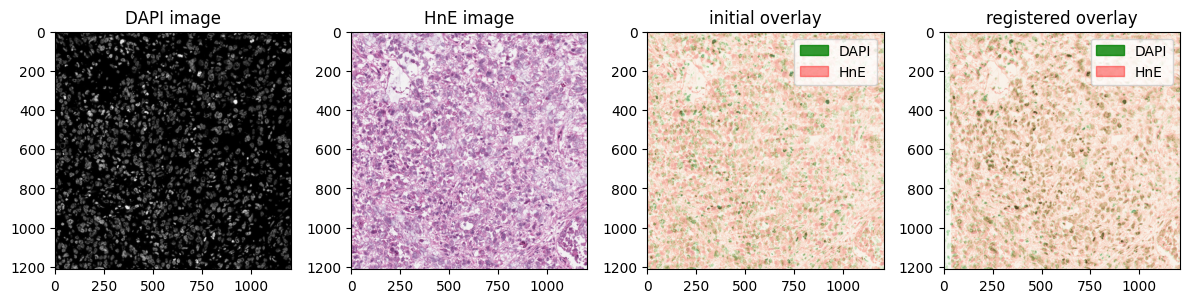

rTRE before registration:  0.01652887481741522
rTRE after feature based registration:  0.003221048083294103
normalized MI before registration:  0.0004580422502259502
normalized MI after feature based registration:  0.029971924228128194


In [ ]:
# similarity transform 
img2_tforms, img2_registered, img2_tre_pts = stainwarpy.register_DAPI_HnE(dapi2_init, hne2_deconv)
display_img_comparison(dapi2_init, hne2_init, hne2_deconv,img2_registered)
tre = stainwarpy.compute_TRE(img2_tforms, img2_tre_pts, dapi2_init)
mi = stainwarpy.compute_mutual_information(dapi2_init, hne2_deconv, img2_registered)

Feature based registration completed.


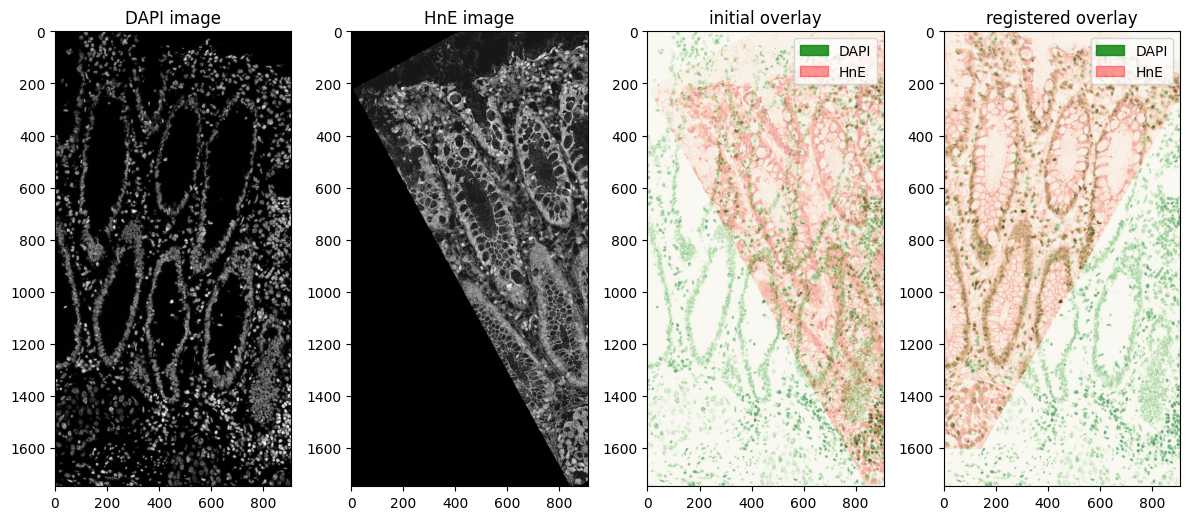

normalized MI before registration:  0.002483803827255941
normalized MI after feature based registration:  0.04041054842522876


In [8]:
# similarity transform
hne1_applying_tform = AffineTransform(scale=(1.0, 1.0), rotation=0.5, translation=(100, -200))
hne1_testing_img = warp(hne1_deconv, hne1_applying_tform)
img1_test_tforms, img1_test_registered, img1_test_tre_pts = stainwarpy.register_DAPI_HnE(dapi1_init, hne1_testing_img)
display_img_comparison(dapi1_init, hne1_testing_img, hne1_testing_img,img1_test_registered)
mi = stainwarpy.compute_mutual_information(dapi1_init, hne1_testing_img, img1_test_registered)

## DAPI as moving image

#### Load data

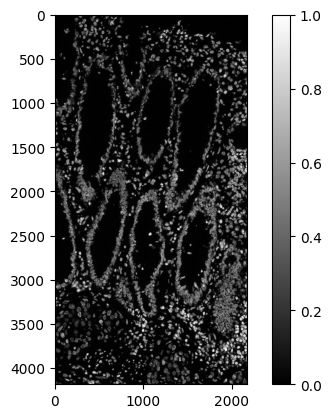

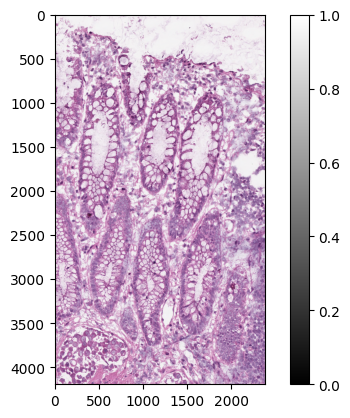

In [ ]:
# load dapi
dapim_img_data = load_image_data("../../../Data/for_testing/exmp_1/cropped/dapi")
dapi1m_init = dapim_img_data[0]
dapi2m_init = dapim_img_data[1]

# load hne
hnef_image_data = load_image_data("../../../Data/for_testing/exmp_1/cropped/hne")
hne1f_init = resize(hnef_image_data[0], (int(hnef_image_data[0].shape[0]*scale), int(hnef_image_data[0].shape[1]*scale)), anti_aliasing=True)
hne2f_init = resize(hnef_image_data[1], (int(hnef_image_data[1].shape[0]*scale), int(hnef_image_data[1].shape[1]*scale)), anti_aliasing=True)
hne1f_init, hne2f_init = hne1f_init*255, hne2f_init*255

display_image(dapi1m_init)
display_image(hne1f_init)

#### Preprocess images

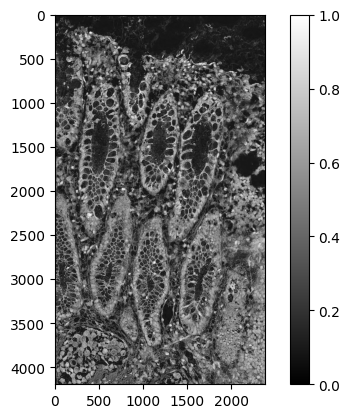

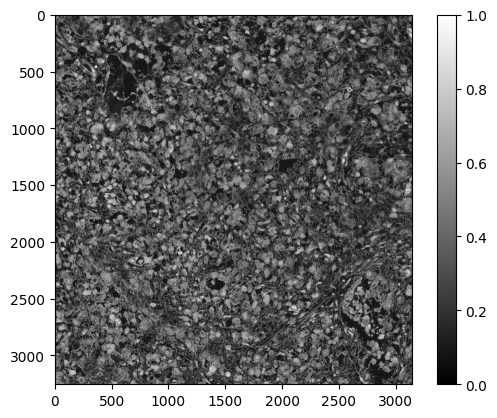

In [ ]:
hne1f_deconv = stainwarpy.colour_deconvolusion_preprocessing_HnE(hne1f_init)
hne2f_deconv = stainwarpy.colour_deconvolusion_preprocessing_HnE(hne2f_init)
display_image(hne1f_deconv)
display_image(hne2f_deconv)

#### Register images

In [19]:
def overlay_images_hnef(hne_img, dapi_img, hne_deconv, title='overlay'):
    h, w = hne_deconv.shape
    plt.imshow(dapi_img, cmap='Greens', alpha=1)
    plt.imshow(hne_img, cmap='Reds', alpha=0.4)
    plt.title(title)
    plt.axis([0, w, h, 0])
    
    legend_patches = [
        Patch(color='green', label='DAPI', alpha=0.8),
        Patch(color='red', label='HnE', alpha=0.4)
    ]
    plt.legend(handles=legend_patches)

def display_img_comparison_hnef(dapi_img, hne_img, hne_deconv, registered_dapi_img):
    h, w = hne_deconv.shape
    
    plt.figure(figsize=(4*3, 6))

    plt.subplot(1, 4, 1)
    img = hne_img.astype(float)
    img = img / img.max()
    plt.title('HnE image')
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.axis([0, w, h, 0])

    plt.subplot(1, 4, 2)
    plt.title('DAPI image')
    plt.imshow(dapi_img, cmap='gray')
    plt.axis([0, w, h, 0])

    plt.subplot(1, 4, 3)
    overlay_images_hnef(hne_deconv, dapi_img, hne_deconv, title='initial overlay')

    plt.subplot(1, 4, 4)
    overlay_images_hnef(hne_deconv, registered_dapi_img, hne_deconv, title='registered overlay')

    plt.tight_layout()
    plt.show()

Feature based registration completed.


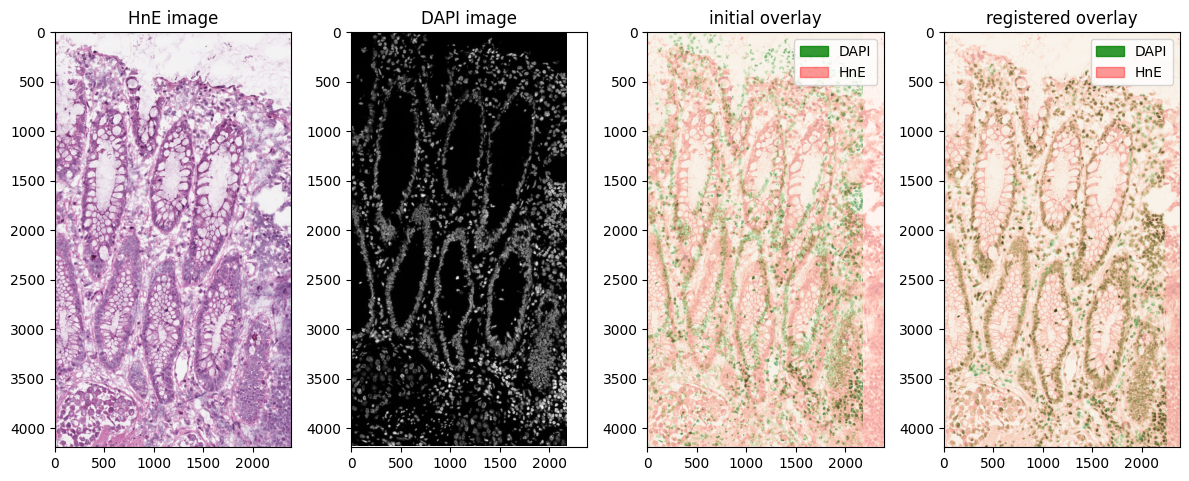

normalized MI before registration:  0.0024852461465989044
normalized MI after feature based registration:  0.06507419923176601


In [ ]:
# similarity transform 
img1_tforms, img1_registered, img1_tre_pts = stainwarpy.register_DAPI_HnE(hne1f_deconv, dapi1m_init)
display_img_comparison_hnef(dapi1m_init, hne1f_init, hne1f_deconv, img1_registered)
mi = stainwarpy.compute_mutual_information(hne1f_deconv, dapi1m_init, img1_registered)

Feature based registration completed.


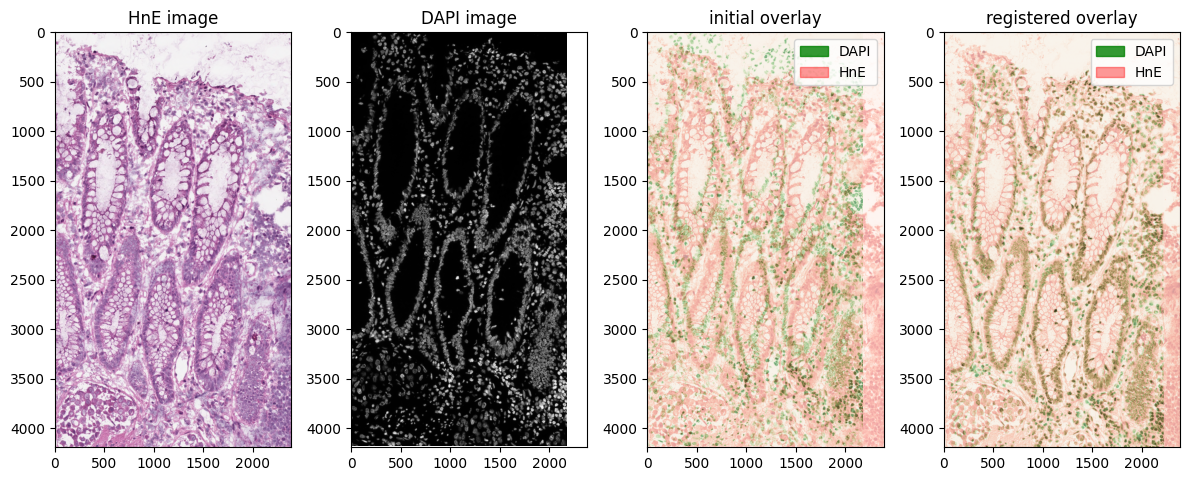

normalized MI before registration:  0.0024852461465989044
normalized MI after feature based registration:  0.04956935243820287


In [ ]:
# affine transform
img1_tforms, img1_registered, img1_tre_pts = stainwarpy.register_DAPI_HnE(hne1f_deconv, dapi1m_init, feature_tform='affine')
display_img_comparison_hnef(dapi1m_init, hne1f_init, hne1f_deconv, img1_registered)
mi = stainwarpy.compute_mutual_information(hne1f_deconv, dapi1m_init, img1_registered)

## Registration with regPipeline

In [ ]:
##### HnE as moving image

# similarity transform
transformation_maps, moved_img, tre, mi = stainwarpy.registration_pipeline("../../../Data/for_testing/exmp_1/cropped/dapi/dapi_cropped_1.tif", 
                                                                                   "../../../Data/for_testing/exmp_1/cropped/hne/hne_cropped_1.tif", 0.209877, 0.5023, fixed_img='multiplexed')

Images loaded.
Preprocessing completed.
Feature based registration completed.
rTRE before registration:  0.06814488497813145
rTRE after feature based registration:  0.0006589588611253061
normalized MI before registration:  0.0024897097794239183
normalized MI after feature based registration:  0.05429741363756572


In [ ]:
# affine transform
transformation_maps, moved_img, tre, mi = stainwarpy.registration_pipeline("../../../Data/for_testing/exmp_1/cropped/dapi/dapi_cropped_1.tif", 
                                                                                   "../../../Data/for_testing/exmp_1/cropped/hne/hne_cropped_1.tif", 0.209877, 0.5023, fixed_img='multiplexed',
                                                                                   feature_tform='affine')

Images loaded.
Preprocessing completed.
Feature based registration completed.
rTRE before registration:  0.06821347101074378
rTRE after feature based registration:  0.0004764546864215744
normalized MI before registration:  0.0024897097794239183
normalized MI after feature based registration:  0.04821406251145775


In [ ]:
# DAPI as moving image
transformation_maps, moved_img, tre, mi = stainwarpy.registration_pipeline("../../../Data/for_testing/exmp_1/cropped/hne/hne_cropped_1.tif", 
                                                                                   "../../../Data/for_testing/exmp_1/cropped/dapi/dapi_cropped_1.tif", 0.5023, 0.209877, fixed_img='hne')

Images loaded.
Preprocessing completed.
Feature based registration completed.
rTRE before registration:  0.06789581422548385
rTRE after feature based registration:  0.0006126262639678418
normalized MI before registration:  0.0024852461465989044
normalized MI after feature based registration:  0.06502181189870695


In [ ]:
##################### for cli

# stainwarpy register ../../Data/for_testing/exmp_1/cropped/dapi/dapi_cropped_1.tif ../../Data/for_testing/exmp_1/cropped/hne/hne_cropped_1.tif ../../Data multiplexed --fixed-px-sz 0.209877 --moving-px-sz 0.5023  --feature-tform affine
